# Classifying Respiratory Diseases from Chest X-Ray Images Using Machine Learning

## Problem Statement
The primary goal of this project is to develop a robust machine learning model capable of classifying five categories of chest X-ray images. Four of these categories represent respiratory diseases: COVID-19, Pneumonia, Tuberculosis, and Lung Opacity. The fifth category is Normal instances with no sign of disease. The focus of this analysis is on distinguishing COVID-19 from other respiratory diseases, which is crucial for improving diagnostic accuracy and assisting in early detection.

## Client and Motivation
The intended clients for this project are healthcare providers, including hospitals, clinics, and diagnostic centers, as well as public health organizations. These stakeholders are deeply concerned with improving diagnostic accuracy and speeding up the detection of diseases like COVID-19. An accurate classification system will assist radiologists in diagnosing patients more efficiently and reduce the manual workload.

## Data Description and Acquisition
The dataset is a combination of chest X-ray images collected from multiple sources, representing a diverse set of patients and conditions. The five classes to be classified are:
1. COVID-19
2. Pneumonia
3. Tuberculosis
4. Lung Opacity
5. Normal (no disease)

### Steps

1. **Data Loading and Preprocessing**: Load the dataset and apply necessary preprocessing steps.
2. **Model Definition**: Define the architecture of the model using a pretrained ResNet-18.
3. **Training**: Train the model on the training dataset and validate it using the validation dataset.
4. **Evaluation**: Evaluate the model's performance on the test dataset and analyze the results.
5. **Conclusion**: Summarize the results and discuss potential improvements.

In [1]:
# Import necessary libraries
import import_ipynb
from preprocessing import load_data, create_data_loaders
from model import create_model
from train import train_model
from evaluate import evaluate_model
from predict import Predictor
from pathlib import Path
import torch
import os

In [2]:
# Define paths and parameters
path = Path("../raw_data")
batch_size = 64
epochs = 50

In [3]:
# Data Preprocessing
train_ds, val_ds, test_ds = load_data(path)
train_dl, val_dl, test_dl = create_data_loaders(train_ds, val_ds, test_ds, batch_size)

In [4]:
# Model Architecture
model = create_model(num_classes=5)

In [5]:
# Training Process
trained_model = train_model(model, train_dl, val_dl, epochs)

Epoch 1, Training Loss: 0.3520665583276593
Epoch 1, Validation Loss: 7.664800271140954
Epoch 2, Training Loss: 0.21819348525292323
Epoch 2, Validation Loss: 0.6982690102411705
Epoch 3, Training Loss: 0.17728009779940598
Epoch 3, Validation Loss: 5.882899170406886
Epoch 4, Training Loss: 0.16623073787783374
Epoch 4, Validation Loss: 4.460838413598395
Epoch 5, Training Loss: 0.13686137500216014
Epoch 5, Validation Loss: 0.6514509251720987
Epoch 6, Training Loss: 0.13701502132420626
Epoch 6, Validation Loss: 1.1859124574902946
Epoch 7, Training Loss: 0.1184142585267413
Epoch 7, Validation Loss: 1.7746170696449801
Epoch 8, Training Loss: 0.11172133270068646
Epoch 8, Validation Loss: 12.981010048621494
Epoch 9, Training Loss: 0.09612048775297423
Epoch 9, Validation Loss: 2.749694837892464
Epoch 10, Training Loss: 0.08288508905734904
Epoch 10, Validation Loss: 2.0411931183550833
Epoch 11, Training Loss: 0.08108272314896801
Epoch 11, Validation Loss: 1.0245366206266058
Epoch 00011: reducing l

Accuracy on Test Set: 0.9628440366972477
F1 Score on Test Set: 0.9628023725505138


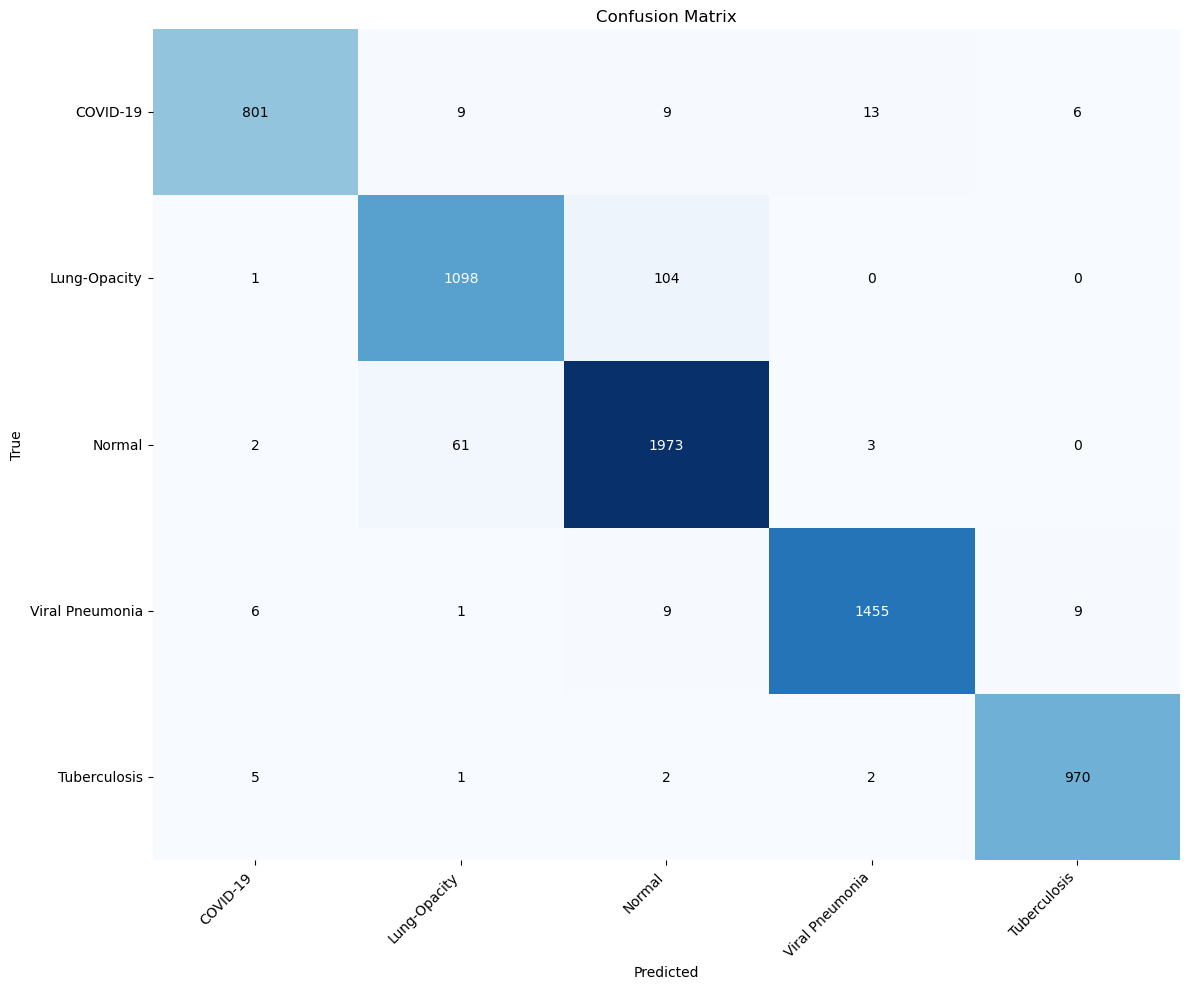

In [6]:
# Evaluation
evaluate_model(trained_model, test_dl)

In [7]:
# Save the trained model
model_dir = "../model"
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, "my_trained_model.pth")
torch.save(trained_model.state_dict(), model_path)

In [11]:
# Inference
predictor = Predictor(trained_model)
img_path = '../sample/example.jpg'
prediction = predictor.predict(img_path)
print(f"Predicted class: {prediction}")

Predicted class: COVID-19


## Conclusion

In this notebook, we developed and trained a deep learning model to classify chest X-ray images into five different respiratory disease categories. 
The model, based on the ResNet-18 architecture, was fine-tuned on our dataset, and its performance was evaluated using accuracy, F1-score, and confusion matrix.

### Key Takeaways

- Transfer learning with a pretrained ResNet-18 model provided a strong baseline for classification.
- The model achieved satisfactory performance, but there is room for improvement through hyperparameter tuning and data augmentation.

### Future Work

- Explore more complex architectures or ensemble models to improve accuracy.
- Apply more extensive data augmentation techniques to enhance model robustness.
- Experiment with different learning rate schedules and optimizers.